# 111學年大專院校校別學生數 資料集處理 (LATIA 112-1)
TA: CSIE 116 王修佑

## 讀取資料

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import random
plt.rc('font', family='Microsoft JhengHei')

df = pd.read_csv('111_student.csv', encoding='utf-8')
df.isnull().sum().sum() #檢查空值數量

0

In [2]:
df

,學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,...,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別
0,1,國立政治大學,D 日,D 博士,922,530,392,78,63,88,...,70,50,66,45,75,40,-,-,30 臺北市,1 一般
1,1,國立政治大學,D 日,M 碩士,"4,203","1,907","2,296",663,823,611,...,2,2,-,-,-,-,-,-,30 臺北市,1 一般
2,1,國立政治大學,D 日,B 學士,"9,732","3,976","5,756",875,"1,388",927,...,-,-,-,-,-,-,336,430,30 臺北市,1 一般
3,1,國立政治大學,N 職,M 碩士,"1,870",921,949,278,292,278,...,68,61,1,1,-,-,-,-,30 臺北市,1 一般
4,2,國立清華大學,D 日,D 博士,"1,669","1,169",500,227,97,215,...,139,67,94,41,131,54,-,-,18 新竹市,1 一般
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1293,崇仁醫護管理專科學校,D 日,5 五專,"3,051",431,"2,620",82,511,106,...,68,507,-,-,-,-,14,41,10 嘉義縣,2 技職
779,3002,臺北市立大學,D 日,D 博士,211,95,116,16,17,15,...,12,12,6,8,18,25,-,-,30 臺北市,1 一般
780,3002,臺北市立大學,D 日,M 碩士,"1,342",414,928,116,276,124,...,18,51,26,53,-,-,-,-,30 臺北市,1 一般
781,3002,臺北市立大學,D 日,B 學士,"5,287","2,332","2,955",584,684,538,...,-,-,-,-,-,-,153,124,30 臺北市,1 一般


## 1. Lab 01 - 資料概覽
本資料集總共收集了多少學校，請依國立/私立、等級別、縣市別、北中南東區、體系別區分。

### 國立？所；私立？所

In [3]:
type_list = []

for i in df['學校名稱']:
    if ('國立' in i) or ('市立' in i):
        type_list.append('國立')
    else:
        type_list.append('私立')

df['公私立'] = type_list # 將 Dataframe 新增「公私立」column

In [4]:
df1 = df.drop_duplicates('學校代碼')
count = df1['公私立'].value_counts()

print(f"本資料集共收集了 {len(df1)} 所學校，其中公立：{count['國立']} 所；私立：{count['私立']} 所。")

本資料集共收集了 148 所學校，其中公立：47 所；私立：101 所。


### 各等級別有？所

In [5]:
df1 = df.drop_duplicates(subset=['學校名稱', '等級別'])
count = df1['等級別'].value_counts()
degree_list = list(df['等級別'].unique())

print(f"本資料集總共收集了 {len(set(df['學校代碼']))} 所學校，各等級學制當中：")
for degree in degree_list:
    print(f"{count[degree]} 所有招收{degree[2:]}")

本資料集總共收集了 148 所學校，各等級學制當中：
82 所有招收博士
131 所有招收碩士
68 所有招收學士
1 所有招收4+X
74 所有招收二技
68 所有招收四技
47 所有招收五專
2 所有招收七年
49 所有招收二專
1 所有招收二年制


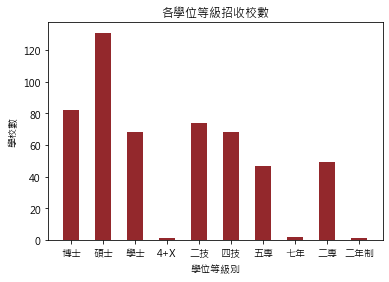

In [56]:
df1 = df.drop_duplicates(subset=['學校名稱', '等級別'])
count = df1['等級別'].value_counts()
listx = [x[2:] for x in list(df['等級別'].unique())]
listy = [count[x] for x in list(df['等級別'].unique())]

plt.bar(listx, listy, width=0.5, color='#93282c')
plt.title('各學位等級招收校數')
plt.xlabel('學位等級別')
plt.ylabel('學校數')
plt.show()

### 各縣市分別有？所

In [61]:
city_list = []
for i in df['縣市名稱']:
    city_list.append(i[3:])
df['縣市名稱'] = city_list

In [62]:
df1 = df.drop_duplicates('學校代碼')
count = df1['縣市名稱'].value_counts()
city_list = df1['縣市名稱'].unique()
print(f"本資料集共收集了 {len(df1)} 所學校，其中：")
for city in city_list:
    print(f"{city}有 {count[city]} 所")

本資料集共收集了 148 所學校，其中：
臺北市有 24 所
新竹市有 5 所
臺南市有 14 所
臺中市有 17 所
桃園市有 12 所
高雄市有 16 所
基隆市有 3 所
嘉義縣有 4 所
彰化縣有 5 所
新北市有 20 所
嘉義市有 2 所
花蓮縣有 4 所
南投縣有 2 所
雲林縣有 3 所
屏東縣有 5 所
臺東縣有 2 所
宜蘭縣有 3 所
苗栗縣有 3 所
澎湖縣有 1 所
金門縣有 1 所
新竹縣有 2 所


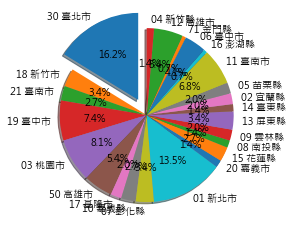

In [91]:
df1 = df.drop_duplicates('學校代碼')
count = df1['縣市名稱'].value_counts()
city_list = df1['縣市名稱'].unique()
sizes = [count[x] for x in df1['縣市名稱'].unique()]
labels = city_list
#colors = [(random.randint(0,255),random.randint(0,255),random.randint(0,255)) for _ in range(21)]
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes,
       explode=explode,
       labels=labels,
       labeldistance=1.1,
       autopct="%2.1f%%",
       pctdistance=0.6,
       shadow=True,
       startangle=90)
plt.show()

### 北中南東區分別有？所

> 都市及區域發展統計彙編 - 國發會 https://www.ndc.gov.tw/nc_77_4402

In [63]:
city_to_area = {'臺北市':'北部', 
                '新北市':'北部', 
                '基隆市':'北部', 
                '新竹市':'北部', 
                '桃園市':'北部', 
                '新竹縣':'北部', 
                '宜蘭縣':'北部', 
                '臺中市':'中部', 
                '苗栗縣':'中部', 
                '彰化縣':'中部', 
                '南投縣':'中部', 
                '雲林縣':'中部', 
                '高雄市':'南部', 
                '臺南市':'南部', 
                '嘉義市':'南部', 
                '嘉義縣':'南部', 
                '屏東縣':'南部', 
                '澎湖縣':'南部', 
                '花蓮縣':'東部', 
                '臺東縣':'東部', 
                '金門縣':'福建省'}
df['區域'] = df['縣市名稱'].map(city_to_area)

In [64]:
df1 = df.drop_duplicates('學校代碼')
count = df1['區域'].value_counts()

print(f"本資料集共收集了 {len(df1)} 所學校，其中：")
print(f"北部區域有 {count['北部']} 所；\n中部區域有 {count['中部']} 所；\n南部區域有 {count['南部']} 所；\n東部區域有 {count['東部']} 所；\n福建省區域有 {count['福建省']} 所。")

本資料集共收集了 148 所學校，其中：
北部區域有 69 所；
中部區域有 30 所；
南部區域有 42 所；
東部區域有 6 所；
福建省區域有 1 所。


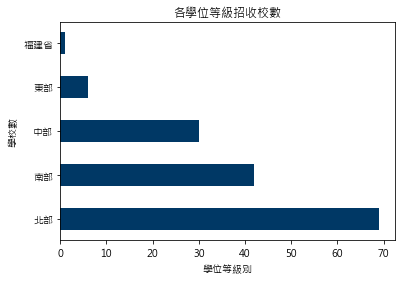

In [68]:
df1 = df.drop_duplicates('學校代碼')
count = df1['區域'].value_counts()
listx = [count[x] for x in list(df['區域'].unique())]
listy = df['區域'].unique()

plt.barh(listy, listx, height=0.5, color='#003865')
plt.title('各學位等級招收校數')
plt.xlabel('學位等級別')
plt.ylabel('學校數')
plt.show()

### 各體系別分別有？所

In [10]:
df1 = df.drop_duplicates('學校代碼')
count = df1['體系別'].value_counts()

print(f"本資料集共收集了 {len(df1)} 所學校，其中：技職體系有 {count['2 技職']} 所；一般體系有 {count['1 一般']} 所；師範體系有 {count['3 師範']} 所。")

本資料集共收集了 148 所學校，其中：技職體系有 80 所；一般體系有 63 所；師範體系有 5 所。


## Lab 02 - 國立/私立與男女比
請問國立大學與私立大學在學男生女生比例為何? 延修生男生女生比例為何?

In [11]:
# 空白值補零
df = df.replace('-', 0, regex=True)
df = df.replace(',', '', regex=True)
# df

In [12]:
count = {}

def create_count_dict(df, count): # 建立多層 dict 結構來儲存各校在學與延修生的男女生數
    df1 = df.drop_duplicates('學校代碼')
    for i in df1['學校名稱']:
        count[i] = {}
        count[i]['在學生'] = {}
        count[i]['在學生']['男生數'] = 0
        count[i]['在學生']['女生數'] = 0
        count[i]['延修生'] = {}
        count[i]['延修生']['男生數'] = 0
        count[i]['延修生']['女生數'] = 0

def count_every_schools_data(df):
    for j in range(len(df)):
        count[df.iloc[j,1]]['在學生']['男生數'] += (int(df.iloc[j,7]) + int(df.iloc[j,9]) + int(df.iloc[j,11]) + int(df.iloc[j,13]) + int(df.iloc[j,15]) + int(df.iloc[j,17]) + int(df.iloc[j,19]))
        count[df.iloc[j,1]]['在學生']['女生數'] += (int(df.iloc[j,8]) + int(df.iloc[j,10]) + int(df.iloc[j,12]) + int(df.iloc[j,14]) + int(df.iloc[j,16]) + int(df.iloc[j,18]) + int(df.iloc[j,20]))
        count[df.iloc[j,1]]['延修生']['男生數'] += int(df.iloc[j,21])
        count[df.iloc[j,1]]['延修生']['女生數'] += int(df.iloc[j,22])

create_count_dict(df, count)
count_every_schools_data(df)

### 國立大學在學生男女比

In [13]:
public_current_male = 0
public_current_female = 0

df1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df1)):
    if df1.loc[i,'公私立'] == '國立':
        public_current_male += count[df1.loc[i,'學校名稱']]['在學生']['男生數']
        public_current_female += count[df1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = public_current_male/public_current_female*100 # 男女比計算公式
print(f'國立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

國立大學在學生男女比：119.55686062487909 ≑ 119.56


### 私立大學在學生男女比

In [14]:
private_current_male = 0
private_current_female = 0

df1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df1)):
    if df1.loc[i,'公私立'] == '私立':
        private_current_male += count[df1.loc[i,'學校名稱']]['在學生']['男生數']
        private_current_female += count[df1.loc[i,'學校名稱']]['在學生']['女生數']

ratio = private_current_male/private_current_female*100 # 男女比計算公式
print(f'私立大學在學生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

私立大學在學生男女比：83.3794528902844 ≑ 83.38


### 國立大學延修生男女比

In [15]:
public_extension_male = 0
public_extension_female = 0

df1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df1)):
    if df1.loc[i,'公私立'] == '國立':
        public_extension_male += count[df1.loc[i,'學校名稱']]['延修生']['男生數']
        public_extension_female += count[df1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = public_extension_male/public_extension_female*100 # 男女比計算公式
print(f'國立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

國立大學延修生男女比：146.46375791695988 ≑ 146.46


### 私立大學延修生男女比

In [16]:
private_extension_male = 0
private_extension_female = 0

df1 = df.drop_duplicates('學校代碼', ignore_index=True)
for i in range(len(df1)):
    if df1.loc[i,'公私立'] == '私立':
        private_extension_male += count[df1.loc[i,'學校名稱']]['延修生']['男生數']
        private_extension_female += count[df1.loc[i,'學校名稱']]['延修生']['女生數']

ratio = private_extension_male/private_extension_female*100 # 男女比計算公式
print(f'私立大學延修生男女比：{ratio} ≑ {round(ratio,2)}') # 四捨五入至小數點後兩位

私立大學延修生男女比：134.9412577747063 ≑ 134.94


## Lab 03 - 體系與男女比
請問各體系學校在學男生女生比例為何? 延修生男生女生比例為何?

In [17]:
current_male = 0
current_female = 0
extension_male = 0
extension_female = 0

df1 = df.drop_duplicates('學校代碼', ignore_index=True)
system_list = list(df['體系別'].unique())
for system in system_list:
    for i in range(len(df1)):
        if df1.loc[i, '體系別'] == system:
            current_male += count[df1.loc[i,'學校名稱']]['在學生']['男生數']
            current_female += count[df1.loc[i,'學校名稱']]['在學生']['女生數']
            extension_male += count[df1.loc[i,'學校名稱']]['延修生']['男生數']
            extension_female += count[df1.loc[i,'學校名稱']]['延修生']['女生數']
    print(f"在{system[2:]}體系別中\n在學生男女比大約為 {round(current_male/current_female*100,2)}；延修生男女比大約為 {round(extension_male/extension_female*100,2)}\n")
    current_male, current_female, extension_male, extension_female = 0, 0, 0, 0

在一般體系別中
在學生男女比大約為 100.68；延修生男女比大約為 136.39

在師範體系別中
在學生男女比大約為 71.57；延修生男女比大約為 106.82

在技職體系別中
在學生男女比大約為 94.25；延修生男女比大約為 142.03



## Lab 04 - 地緣與男女比
請問各縣市學校在學男生女生比例為何? 北中南東各區在學男生女生比例為何?

In [18]:
count1 = {}
df_city = df.drop_duplicates('縣市名稱', ignore_index=True)
df_area = df.drop_duplicates('區域', ignore_index=True)
for i in df_area['區域']:
    count1[i] = {}
    for j in range(len(df_city)):
        if df_city.loc[j, '區域'] == i:
            count1[i][df_city.loc[j, '縣市名稱']] = {}
            count1[i][df_city.loc[j, '縣市名稱']]['在學男生數'] = 0
            count1[i][df_city.loc[j, '縣市名稱']]['在學女生數'] = 0

for i in range(len(df)):
    count1[df.loc[i, '區域']][df.loc[i, '縣市名稱']]['在學男生數'] += (int(df.iloc[i,7]) + int(df.iloc[i,9]) + int(df.iloc[i,11]) + int(df.iloc[i,13]) + int(df.iloc[i,15]) + int(df.iloc[i,17]) + int(df.iloc[i,19]))
    count1[df.loc[i, '區域']][df.loc[i, '縣市名稱']]['在學女生數'] += (int(df.iloc[i,8]) + int(df.iloc[i,10]) + int(df.iloc[i,12]) + int(df.iloc[i,14]) + int(df.iloc[i,16]) + int(df.iloc[i,18]) + int(df.iloc[i,20]))

### 各縣市學校在學男女比

In [19]:
area_list = list(df['區域'].unique())
for area in area_list:
    for city in count1[area]:
        print(f"{city}在學男女比為 {count1[area][city]['在學男生數']/count1[area][city]['在學女生數']*100} ≑ {round(count1[area][city]['在學男生數']/count1[area][city]['在學女生數']*100,2)}")

臺北市在學男女比為 88.19249054040942 ≑ 88.19
新竹市在學男女比為 138.88615324010243 ≑ 138.89
桃園市在學男女比為 109.98594486760973 ≑ 109.99
基隆市在學男女比為 120.2080962445131 ≑ 120.21
新北市在學男女比為 89.13528569889661 ≑ 89.14
宜蘭縣在學男女比為 103.56342903685605 ≑ 103.56
新竹縣在學男女比為 150.14520813165538 ≑ 150.15
臺南市在學男女比為 93.00533958583729 ≑ 93.01
高雄市在學男女比為 97.03158656038238 ≑ 97.03
嘉義縣在學男女比為 94.9824091137544 ≑ 94.98
嘉義市在學男女比為 103.10971348707199 ≑ 103.11
屏東縣在學男女比為 74.55148754288285 ≑ 74.55
澎湖縣在學男女比為 158.47145488029466 ≑ 158.47
臺中市在學男女比為 86.90277421012073 ≑ 86.9
彰化縣在學男女比為 128.85936268438238 ≑ 128.86
南投縣在學男女比為 114.95372625426205 ≑ 114.95
雲林縣在學男女比為 215.55434486515935 ≑ 215.55
苗栗縣在學男女比為 95.18230723251644 ≑ 95.18
花蓮縣在學男女比為 72.05682649117308 ≑ 72.06
臺東縣在學男女比為 88.79973253092611 ≑ 88.8
金門縣在學男女比為 109.23884514435696 ≑ 109.24


### 北中南東各區學校在學男女比

In [20]:
area_male = 0
area_female = 0
area_list = list(df['區域'].unique())

for area in area_list:
    for city in count1[area]:
        area_male += count1[area][city]['在學男生數']
        area_female += count1[area][city]['在學女生數']
    print(f"{area}地區在學男女比為 {area_male/area_female*100} ≑ {round(area_male/area_female*100, 2)}")
    area_male, area_female = 0, 0

北部地區在學男女比為 97.81123382747066 ≑ 97.81
南部地區在學男女比為 93.5387878185373 ≑ 93.54
中部地區在學男女比為 99.19836889769581 ≑ 99.2
東部地區在學男女比為 76.04266157274753 ≑ 76.04
福建省地區在學男女比為 109.23884514435696 ≑ 109.24


## Lab 05 - 學位等級別與男女比
請問各學位等級別男生女生比例為何? 延修生男生女生比例為何?

In [21]:
degree_list = list(df['等級別'].unique())

degree_male = 0
degree_female = 0
degree_male_ex = 0 # 延修生
degree_female_ex = 0 # 延修生

def ratio(male, female):
    if male == 0 or female == 0:
        result = 0
    else:
        result = round(male/female*100, 2)
    return result
    
for degree in degree_list:
    for i in range(len(df)):
        if df.loc[i, '等級別'] == degree:
            degree_male += (int(df.iloc[i,7]) + int(df.iloc[i,9]) + int(df.iloc[i,11]) + int(df.iloc[i,13]) + int(df.iloc[i,15]) + int(df.iloc[i,17]) + int(df.iloc[i,19]))
            degree_female += (int(df.iloc[i,8]) + int(df.iloc[i,10]) + int(df.iloc[i,12]) + int(df.iloc[i,14]) + int(df.iloc[i,16]) + int(df.iloc[i,18]) + int(df.iloc[i,20]))
            degree_male_ex += int(df.iloc[i,21])
            degree_female_ex += int(df.iloc[i,22])
    print(f"{degree[2:]}在學生男女比大約為 {ratio(degree_male, degree_female)}；", end='')
    print(f"{degree[2:]}延修生男女比大約為 {ratio(degree_male_ex, degree_female_ex)}")
    degree_male, degree_female, degree_male_ex, degree_female_ex = 0, 0, 0, 0

博士在學生男女比大約為 173.46；博士延修生男女比大約為 0
碩士在學生男女比大約為 111.29；碩士延修生男女比大約為 0
學士在學生男女比大約為 94.72；學士延修生男女比大約為 136.18
4+X在學生男女比大約為 0；4+X延修生男女比大約為 0
二技在學生男女比大約為 45.77；二技延修生男女比大約為 79.46
四技在學生男女比大約為 117.44；四技延修生男女比大約為 174.25
五專在學生男女比大約為 30.9；五專延修生男女比大約為 34.43
七年在學生男女比大約為 75.0；七年延修生男女比大約為 0
二專在學生男女比大約為 95.32；二專延修生男女比大約為 158.38
二年制在學生男女比大約為 181.82；二年制延修生男女比大約為 125.0


## Lab 06 - 國立、私立與學位等級別與男女比
請問國立與私立大學各學位等級別男生女生比例為何? 延修生男生女生比例為何?

In [22]:
type_list = list(df['公私立'].unique())
degree_list = list(df['等級別'].unique())

male = 0
female = 0
male_ex = 0 # 延修生
female_ex = 0 # 延修生

def ratio(male, female):
    if male == 0 or female == 0:
        result = 0
    else:
        result = round(male/female*100, 2)
    return result

for type in type_list:
    print(f"在{type}學校中")
    for degree in degree_list:
        for i in range(len(df)):
            if df.loc[i, '等級別'] == degree and df.loc[i, '公私立'] == type:
                male += (int(df.iloc[i,7]) + int(df.iloc[i,9]) + int(df.iloc[i,11]) + int(df.iloc[i,13]) + int(df.iloc[i,15]) + int(df.iloc[i,17]) + int(df.iloc[i,19]))
                female += (int(df.iloc[i,8]) + int(df.iloc[i,10]) + int(df.iloc[i,12]) + int(df.iloc[i,14]) + int(df.iloc[i,16]) + int(df.iloc[i,18]) + int(df.iloc[i,20]))
                male_ex += int(df.iloc[i,21])
                female_ex += int(df.iloc[i,22])
        print(f"{degree[2:]}在學生男女比大約為 {ratio(male, female)}；", end='')
        print(f"{degree[2:]}延修生男女比大約為 {ratio(male_ex, female_ex)}")
        male, female, male_ex, female_ex = 0, 0, 0, 0

在國立學校中
博士在學生男女比大約為 180.68；博士延修生男女比大約為 0
碩士在學生男女比大約為 119.51；碩士延修生男女比大約為 0
學士在學生男女比大約為 111.59；學士延修生男女比大約為 134.95
4+X在學生男女比大約為 0；4+X延修生男女比大約為 0
二技在學生男女比大約為 47.06；二技延修生男女比大約為 81.27
四技在學生男女比大約為 149.47；四技延修生男女比大約為 219.85
五專在學生男女比大約為 51.64；五專延修生男女比大約為 54.14
七年在學生男女比大約為 75.0；七年延修生男女比大約為 0
二專在學生男女比大約為 89.31；二專延修生男女比大約為 161.04
二年制在學生男女比大約為 181.82；二年制延修生男女比大約為 125.0
在私立學校中
博士在學生男女比大約為 150.26；博士延修生男女比大約為 0
碩士在學生男女比大約為 92.35；碩士延修生男女比大約為 0
學士在學生男女比大約為 83.83；學士延修生男女比大約為 136.99
4+X在學生男女比大約為 0；4+X延修生男女比大約為 0
二技在學生男女比大約為 45.45；二技延修生男女比大約為 78.61
四技在學生男女比大約為 107.94；四技延修生男女比大約為 166.14
五專在學生男女比大約為 28.27；五專延修生男女比大約為 32.82
七年在學生男女比大約為 0；七年延修生男女比大約為 0
二專在學生男女比大約為 97.7；二專延修生男女比大約為 156.67
二年制在學生男女比大約為 0；二年制延修生男女比大約為 0


## Lab 07 - 國立、私立與體系與男女比
請問國立與私立大學各體系男生女生比例為何? 延修生男生女生比例為何?

In [23]:
type_list = list(df['公私立'].unique())
system_list = list(df['體系別'].unique())

male = 0
female = 0
male_ex = 0 # 延修生
female_ex = 0 # 延修生

def ratio(male, female):
    if male == 0 or female == 0:
        result = 0
    else:
        result = round(male/female*100, 2)
    return result

for type in type_list:
    print(f"在{type}學校中")
    for system in system_list:
        for i in range(len(df)):
            if df.loc[i, '體系別'] == system and df.loc[i, '公私立'] == type:
                male += (int(df.iloc[i,7]) + int(df.iloc[i,9]) + int(df.iloc[i,11]) + int(df.iloc[i,13]) + int(df.iloc[i,15]) + int(df.iloc[i,17]) + int(df.iloc[i,19]))
                female += (int(df.iloc[i,8]) + int(df.iloc[i,10]) + int(df.iloc[i,12]) + int(df.iloc[i,14]) + int(df.iloc[i,16]) + int(df.iloc[i,18]) + int(df.iloc[i,20]))
                male_ex += int(df.iloc[i,21])
                female_ex += int(df.iloc[i,22])
        print(f"{system[2:]}體系在學生男女比大約為 {ratio(male, female)}；", end='')
        print(f"{system[2:]}體系延修生男女比大約為 {ratio(male_ex, female_ex)}")
        male, female, male_ex, female_ex = 0, 0, 0, 0

在國立學校中
一般體系在學生男女比大約為 122.47；一般體系延修生男女比大約為 139.39
師範體系在學生男女比大約為 71.57；師範體系延修生男女比大約為 106.82
技職體系在學生男女比大約為 133.89；技職體系延修生男女比大約為 178.78
在私立學校中
一般體系在學生男女比大約為 85.38；一般體系延修生男女比大約為 136.99
師範體系在學生男女比大約為 0；師範體系延修生男女比大約為 0
技職體系在學生男女比大約為 81.79；技職體系延修生男女比大約為 133.33


## Lab 08 - 地緣與體系與男女比
請問各區域學校體系男生女生比例為何? 延修生男生女生比例為何?<br>
（以下沒有為縣市別進行交叉分析的原因是：多條件交叉樞紐，縣市別條件過細故忽略）

In [24]:
area_list = list(df['區域'].unique())
system_list = list(df['體系別'].unique())

male = 0
female = 0
male_ex = 0 # 延修生
female_ex = 0 # 延修生

def ratio(male, female):
    if male == 0 or female == 0:
        result = 0
    else:
        result = round(male/female*100, 2)
    return result

for area in area_list:
    print(f"在{area}地區的學校中")
    for system in system_list:
        for i in range(len(df)):
            if df.loc[i, '體系別'] == system and df.loc[i, '區域'] == area:
                male += (int(df.iloc[i,7]) + int(df.iloc[i,9]) + int(df.iloc[i,11]) + int(df.iloc[i,13]) + int(df.iloc[i,15]) + int(df.iloc[i,17]) + int(df.iloc[i,19]))
                female += (int(df.iloc[i,8]) + int(df.iloc[i,10]) + int(df.iloc[i,12]) + int(df.iloc[i,14]) + int(df.iloc[i,16]) + int(df.iloc[i,18]) + int(df.iloc[i,20]))
                male_ex += int(df.iloc[i,21])
                female_ex += int(df.iloc[i,22])
        print(f"{system[2:]}體系在學生男女比大約為 {ratio(male, female)}；", end='')
        print(f"{system[2:]}體系延修生男女比大約為 {ratio(male_ex, female_ex)}")
        male, female, male_ex, female_ex = 0, 0, 0, 0

在北部地區的學校中
一般體系在學生男女比大約為 99.96；一般體系延修生男女比大約為 125.91
師範體系在學生男女比大約為 65.35；師範體系延修生男女比大約為 89.57
技職體系在學生男女比大約為 98.63；技職體系延修生男女比大約為 146.57
在南部地區的學校中
一般體系在學生男女比大約為 112.32；一般體系延修生男女比大約為 167.66
師範體系在學生男女比大約為 78.6；師範體系延修生男女比大約為 90.67
技職體系在學生男女比大約為 84.28；技職體系延修生男女比大約為 130.26
在中部地區的學校中
一般體系在學生男女比大約為 98.81；一般體系延修生男女比大約為 164.18
師範體系在學生男女比大約為 78.72；師範體系延修生男女比大約為 183.65
技職體系在學生男女比大約為 102.08；技職體系延修生男女比大約為 147.51
在東部地區的學校中
一般體系在學生男女比大約為 82.49；一般體系延修生男女比大約為 133.23
師範體系在學生男女比大約為 0；師範體系延修生男女比大約為 0
技職體系在學生男女比大約為 54.82；技職體系延修生男女比大約為 86.25
在福建省地區的學校中
一般體系在學生男女比大約為 109.24；一般體系延修生男女比大約為 243.64
師範體系在學生男女比大約為 0；師範體系延修生男女比大約為 0
技職體系在學生男女比大約為 0；技職體系延修生男女比大約為 0


## Lab 09 - 平均之最
哪一個體系、區域平均每校人數最多與最少？

### 每校平均最多與最少人的體系

In [25]:
df1 = df.drop_duplicates('學校代碼')
system_count = df1['體系別'].value_counts()

system_list = list(df['體系別'].unique())
count_student = 0
result_dict = {}

for system in system_list:
    for i in range(len(df)):
        if df.loc[i,'體系別'] == system:
            count_student += int(df.loc[i, '總計'])
    result_dict[system[2:]] = count_student/system_count[system]
    count_student = 0

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"每校平均最多人的是{max_key}體系，平均每校 {max_value} 人；")
print(f"每校平均最少人的是{min_key}體系，平均每校 {min_value} 人。")

每校平均最多人的是一般體系，平均每校 9241.698412698413 人；
每校平均最少人的是技職體系，平均每校 6436.25 人。


### 每校平均最多與最少人的地區

In [26]:
df1 = df.drop_duplicates('學校代碼')
area_count = df1['區域'].value_counts()

area_list = list(df['區域'].unique())
count_student = 0
result_dict = {}

for area in area_list:
    for i in range(len(df)):
        if df.loc[i,'區域'] == area:
            count_student += int(df.loc[i, '總計'])
    result_dict[area] = count_student/area_count[area]
    count_student = 0

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"每校平均最多人的地區是{max_key}地區，平均每校 {max_value} 人；")
print(f"每校平均最少人的地區是{min_key}地區，平均每校 {min_value} 人。")

每校平均最多人的地區是中部地區，平均每校 8428.8 人；
每校平均最少人的地區是東部地區，平均每校 3832.8333333333335 人。


## Lab 10 - 人數之最

### 全國最多與最少人的學校

In [27]:
result_dict = {}
for school_name in list(df['學校名稱'].unique()):
    result_dict[school_name] = 0

for i in range(len(df)):
    result_dict[df.loc[i, '學校名稱']] += int(df.loc[i, '總計'])

max_value = max(result_dict.values())
min_value = min(result_dict.values())
max_key = next(key for key, value in result_dict.items() if value == max_value)
min_key = next(key for key, value in result_dict.items() if value == min_value)

print(f"全國最多人的學校是{max_key}，共有 {max_value} 人；")
print(f"全國最少人的學校是{min_key}，共有 {min_value} 人。")

全國最多人的學校是國立臺灣大學，共有 33422 人；
全國最少人的學校是和春技術學院，共有 69 人。


### 各體系最多與最少人的學校

In [28]:
result_dict = {}
system_list = list(df['體系別'].unique())

for system in system_list:
    for i in range(len(df)):
        if df.loc[i, '體系別'] == system:
            result_dict[df.loc[i, '學校名稱']] = 0
    for j in range(len(df)):
        if df.loc[j, '體系別'] == system:
            result_dict[df.loc[j, '學校名稱']] += int(df.loc[j, '總計'])
    max_value = max(result_dict.values())
    min_value = min(result_dict.values())
    max_key = next(key for key, value in result_dict.items() if value == max_value)
    min_key = next(key for key, value in result_dict.items() if value == min_value)
    print(f"{system[2:]}體系最多人的學校是{max_key}，共有 {max_value} 人")
    print(f"{system[2:]}體系最少人的學校是{min_key}，共有 {min_value} 人")
    result_dict = {}

一般體系最多人的學校是國立臺灣大學，共有 33422 人
一般體系最少人的學校是康寧大學，共有 194 人
師範體系最多人的學校是國立臺灣師範大學，共有 16262 人
師範體系最少人的學校是國立臺中教育大學，共有 5000 人
技職體系最多人的學校是國立高雄科技大學，共有 27848 人
技職體系最少人的學校是玄奘大學，共有 14 人


### 各地區最多與最少人的學校

In [29]:
result_dict = {}
area_list = list(df['區域'].unique())

for area in area_list:
    for i in range(len(df)):
        if df.loc[i, '區域'] == area:
            result_dict[df.loc[i, '學校名稱']] = 0
    for j in range(len(df)):
        if df.loc[j, '區域'] == area:
            result_dict[df.loc[j, '學校名稱']] += int(df.loc[j, '總計'])
    max_value = max(result_dict.values())
    min_value = min(result_dict.values())
    max_key = next(key for key, value in result_dict.items() if value == max_value)
    min_key = next(key for key, value in result_dict.items() if value == min_value)
    print(f"{area}地區最多人的學校是{max_key}，共有 {max_value} 人")
    print(f"{area}地區最少人的學校是{min_key}，共有 {min_value} 人")
    result_dict = {}

北部地區最多人的學校是國立臺灣大學，共有 33422 人
北部地區最少人的學校是法鼓文理學院，共有 338 人
南部地區最多人的學校是國立高雄科技大學，共有 27848 人
南部地區最少人的學校是和春技術學院，共有 69 人
中部地區最多人的學校是逢甲大學，共有 21441 人
中部地區最少人的學校是中州科技大學，共有 907 人
東部地區最多人的學校是國立東華大學，共有 10280 人
東部地區最少人的學校是國立臺東專科學校，共有 755 人
福建省地區最多人的學校是國立金門大學，共有 4175 人
福建省地區最少人的學校是國立金門大學，共有 4175 人
